In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2019-2024-us-stock-market-data/Stock Market Dataset.csv


#### Time Series Data
Time series data is a sequence of data points collected, tracked, or recorded over time. Each data point in a time series is time-stamped and is associated with a specific point in time, making the sequence of data points indexed in time order. This type of data is found across a wide range of fields, including finance, economics, environmental science, and social sciences, among others. The key characteristic of time series data is its temporal ordering, which allows for the analysis of patterns, trends, and forecasting future values based on historical data.

##### Importance of Time Series
The importance of time series analysis lies in its ability to model and predict future values based on previously observed values. This has significant implications in various domains for decision-making, strategic planning, and understanding temporal dynamics. Time series analysis can uncover hidden patterns in data, such as seasonality, cycles, and trends, that are not apparent in random data sets. By understanding these patterns, analysts can make more informed predictions about future events.

Applications of Time Series
Time series analysis has a wide range of applications across different domains. Here are some of the key areas where time series data is extensively used:

Finance and Economics: Time series analysis is crucial in financial markets for analyzing stock prices, economic indicators, interest rates, and market trends. It helps investors and economists make informed decisions regarding investments, policy making, and economic forecasting.

Weather Forecasting: Meteorological data collected over time, such as temperature, humidity, and wind speed, are analyzed using time series methods to forecast future weather conditions.

Manufacturing and Production: In the manufacturing sector, time series analysis is used to monitor production processes, detect anomalies, forecast demand, and manage inventory levels effectively.

Energy Sector: Time series data is used to forecast energy demand and supply, analyze consumption patterns, and optimize the generation and distribution of energy resources.

Retail and E-commerce: Retailers use time series analysis to forecast sales, understand seasonal trends, and manage inventory levels, which helps in optimizing their operations and improving customer satisfaction.

Healthcare: Time series data from medical records, patient monitoring systems, and epidemiological studies are analyzed to identify trends in diseases, predict outbreaks, and improve patient care.

Telecommunications: Analysis of call records, service usage patterns, and network traffic helps in capacity planning, quality of service optimization, and predicting future trends in telecommunications.

Transportation and Logistics: Time series analysis aids in forecasting traffic patterns, managing fleet operations, and optimizing logistics and supply chain processes.

Environmental Science: Environmental monitoring data, such as air and water quality indices, are analyzed to detect trends, assess environmental impact, and inform conservation efforts.

#### Some of the important components of time series

1. Trend :
The trend component of a time series represents the long-term progression of the data, showing a general direction in which the data is moving over a long period. It can be upward (increasing), downward (decreasing), or horizontal (stable).

2. Seasonality :
Seasonality refers to patterns that repeat at regular intervals over time, such as daily, monthly, or quarterly. Seasonal effects are influenced by factors like weather, holidays, and social customs.

3. Cyclical Components :
Cyclical components are fluctuations in the time series data that occur over periods longer than a year. These cycles are often influenced by economic, political, or even geological factors, and they differ from seasonality because they do not follow a fixed calendar schedule.

4. White Noise :
White noise in a time series is a sequence of random data where each value has a zero mean, constant variance, and no correlation with past values. It represents the unpredictable and random part of a time series.

5. Irregularities :
Irregularities, or "random shocks," are unpredictable one-off variations in the time series data. These could be caused by unforeseen events like natural disasters, strikes, or sudden market crashes.

6. Stationary :
A stationary time series has statistical properties, such as mean, variance, and autocorrelation, that are all constant over time. Stationarity is a desirable property for many statistical methods used in time series analysis.

7. Non-stationary : 
A non-stationary time series has statistical properties that change over time. This can make it challenging to model and forecast accurately. Trends and seasonality are examples of factors that can make a series non-stationary.

8. Autocorrelation : 
Autocorrelation, also known as serial correlation, measures the linear relationship between lagged values of a time series. It's crucial for identifying patterns within the data that can be used for forecasting.

9. Partial Autocorrelation :
Partial autocorrelation measures the correlation between a variable and its lag, controlling for the values of the variables at all shorter lags. It helps in identifying the direct effect of past values on the current value.

10. Differencing :
Differencing is a method used to make a non-stationary time series stationary by subtracting the previous observation from the current observation. This can help eliminate or reduce trend and seasonality.

11. Decomposition :
Decomposition involves separating a time series into its basic components: trend, seasonality, and residuals. This can be done using methods like classical decomposition or seasonal decomposition of time series (STL).

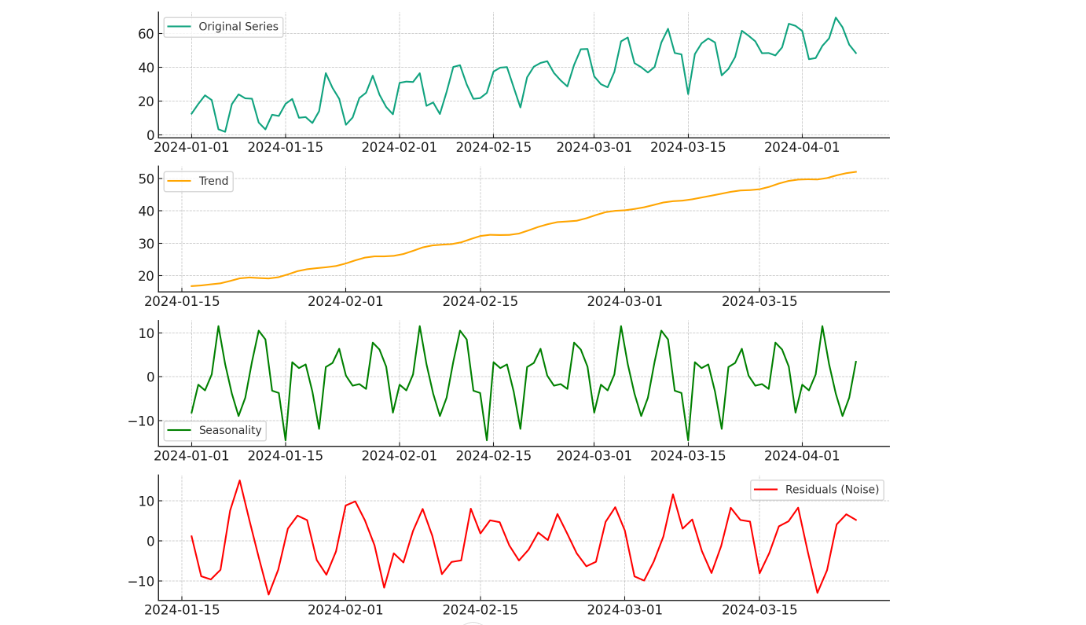

Output image
The graphs above illustrate several key components of time series data using a synthetic dataset:

Original Series: The first plot shows the combined effect of trend, seasonality, and white noise on the time series. It represents how actual time series data might look in a real-world scenario.

Trend: The second plot isolates the trend component, showing a clear upward linear progression over time. This demonstrates how the data's value increases consistently, representing a long-term movement.

Seasonality: The third plot captures the seasonality component, demonstrating a repeating pattern over a fixed period. In this case, the pattern repeats periodically, indicative of seasonal effects.

Residuals (Noise): The fourth plot shows the residuals after removing the trend and seasonality from the original series. This represents the white noise or irregularities that are not explained by the trend or seasonal components.

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/2019-2024-us-stock-market-data/Stock Market Dataset.csv')
df.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

In [5]:
# Convert 'Date' to datetime, specifying the format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set 'Date' column as the index of the DataFrame
df = df.set_index('Date', drop=True)
df.sample(5)

# Drop the 'Unnamed: 0' column from the DataFrame
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.head()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,NaN,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,NaN,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,NaN,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,NaN,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,NaN,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


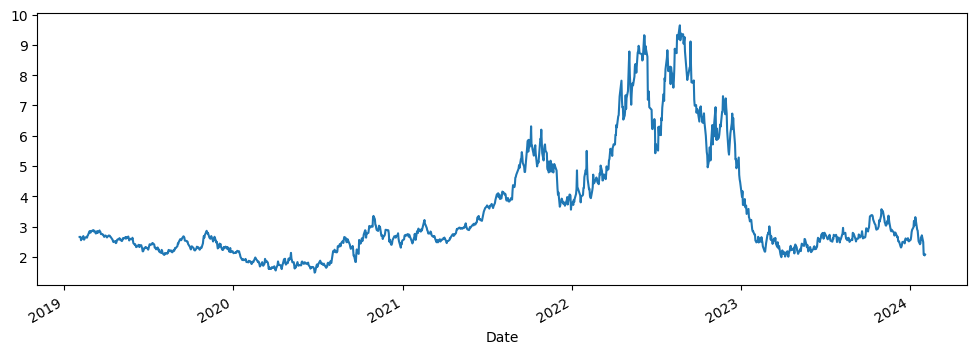

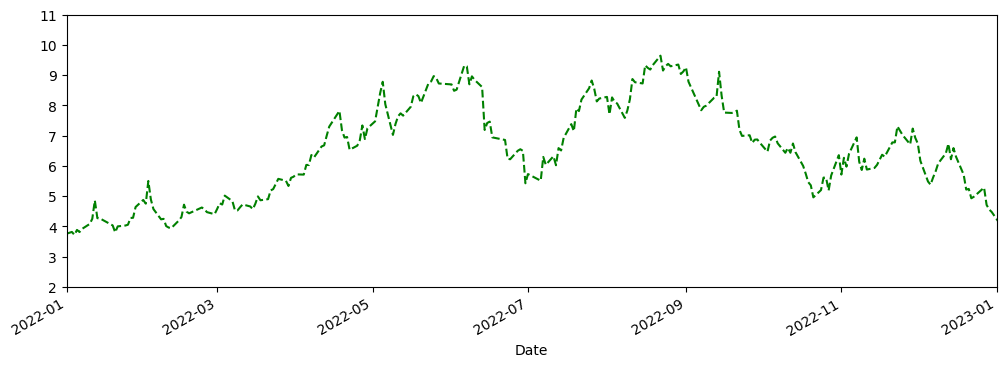

In [7]:
# Plot the 'Natural_Gas_Price' column
df['Natural_Gas_Price'].plot(figsize=(12, 4))
plt.show()  # Show the plot

# Plot the 'Natural_Gas_Price' with specific limits and style
df['Natural_Gas_Price'].plot(xlim=['2022-01-01', '2023-01-01'],ylim=[2,11], figsize=(12, 4), ls='--', c='green')
plt.show()  # Show the plot

In [8]:
# Sort the DataFrame by the index (Date)
df = df.sort_index()

# Check the minimum and maximum dates in the DataFrame
print(df.index.min(), df.index.max())

2019-02-04 00:00:00 2024-02-02 00:00:00


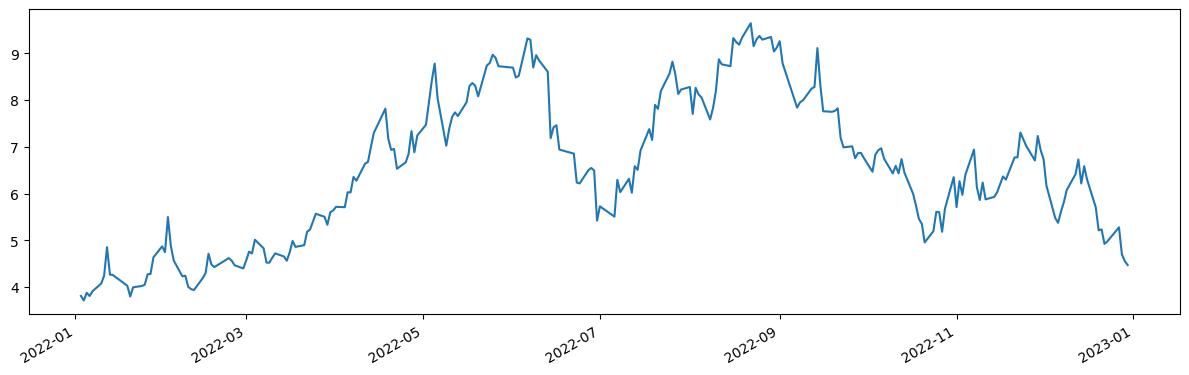

In [9]:
# Extract 'Natural_Gas_Price' for a specific time range
Natural_Gas_Price = df.loc['2022-01-01':'2023-01-01', 'Natural_Gas_Price']

# Create a plot of 'Natural_Gas_Price' over the specified time range
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(Natural_Gas_Price.index, Natural_Gas_Price)
plt.tight_layout()
fig.autofmt_xdate()  # Format the x-axis dates
plt.show()  # Show the plot

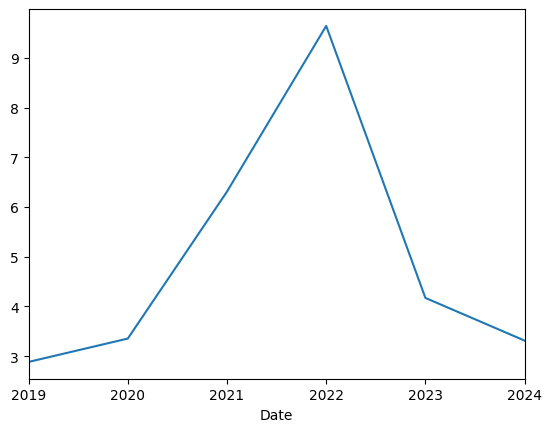

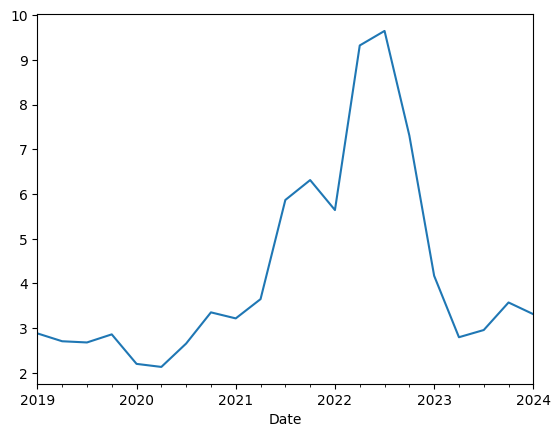

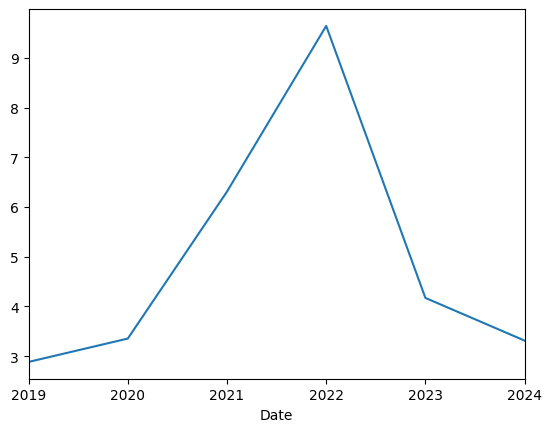

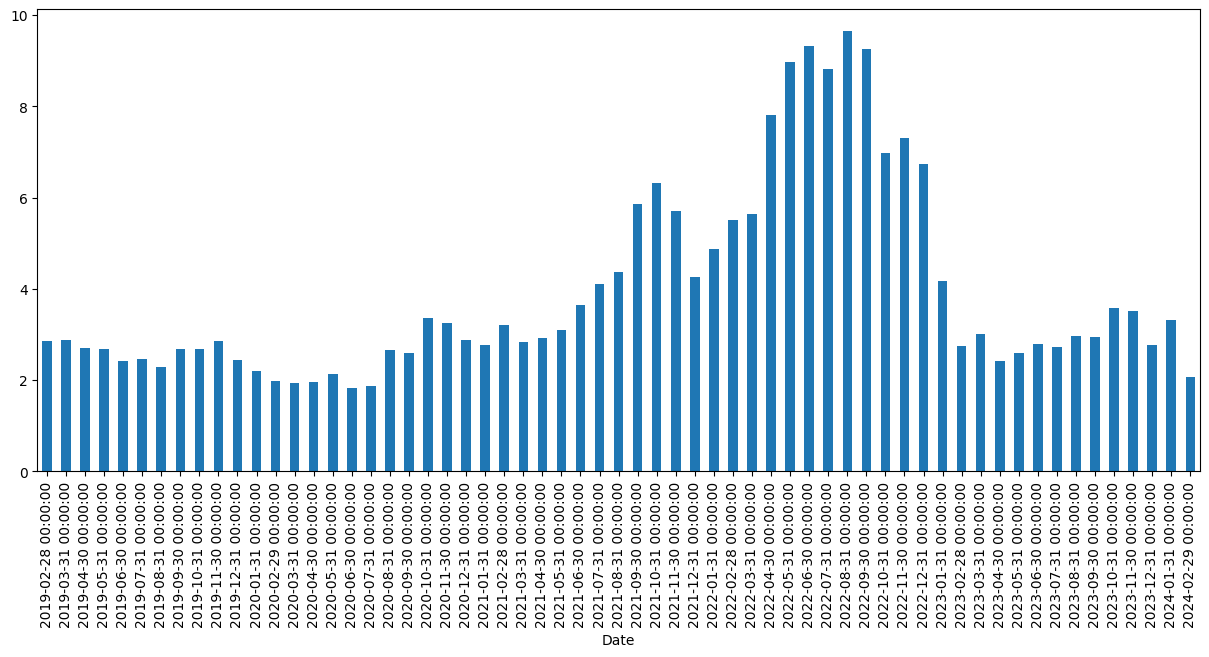

In [10]:
# Resample and plot 'Natural_Gas_Price' using various rules and visualizations
df['Natural_Gas_Price'].resample(rule='A').max().plot()  # Annual maximum
plt.show()

df['Natural_Gas_Price'].resample(rule='QS').max().plot()  # Quarterly maximum, start of quarter
plt.show()

df['Natural_Gas_Price'].resample(rule='BA').max().plot()  # Business year end maximum
plt.show()

# Plot the monthly maximum of 'Natural_Gas_Price' as a bar chart
df['Natural_Gas_Price'].resample(rule='M').max().plot(kind='bar', figsize=(15, 6))
plt.show()

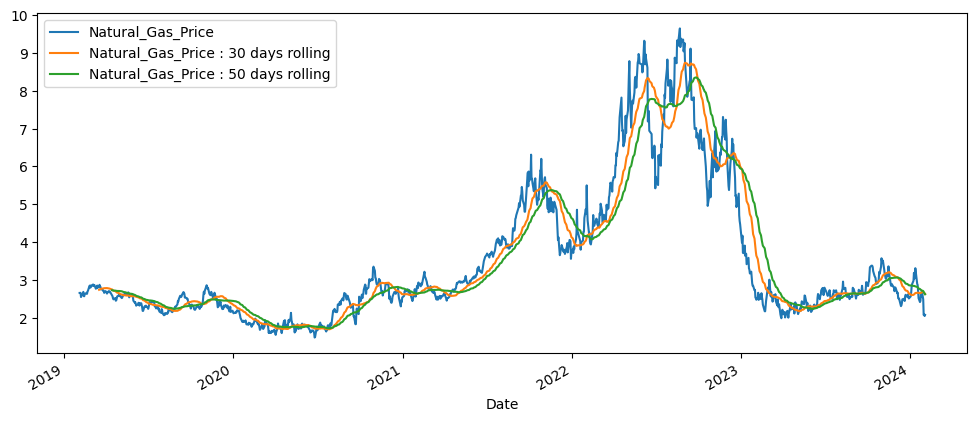

In [11]:
# Calculate and plot rolling averages
df['Natural_Gas_Price'].rolling(10).mean()  # 10-day rolling average of 'High'

# Calculate a 30-day rolling average of 'Natural_Gas_Price' and add it as a new column
df['Natural_Gas_Price : 30 days rolling'] = df['Natural_Gas_Price'].rolling(30).mean()

# Calculate a 50-day rolling average of 'Natural_Gas_Price' and add it as a new column
df['Natural_Gas_Price : 50 days rolling'] = df['Natural_Gas_Price'].rolling(50).mean()

# Plot both 'Natural_Gas_Price' and its 30-day rolling average
df[['Natural_Gas_Price', 'Natural_Gas_Price : 30 days rolling','Natural_Gas_Price : 50 days rolling']].plot(figsize=(12, 5))
plt.show()

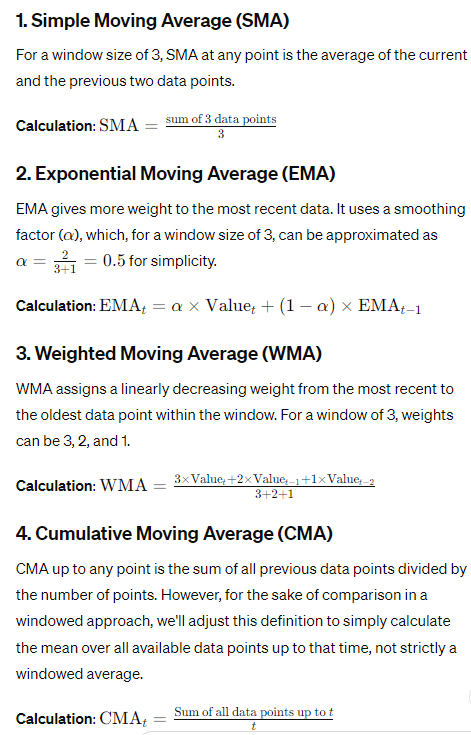

In [12]:
# Calculate a 3-day rolling average of 'Natural_Gas_Price' and add it as a new column
df['Natural_Gas_Price : 3 days rolling'] = df['Natural_Gas_Price'].rolling(window=3, min_periods=2).mean()

# Correctly select and display 'Natural_Gas_Price' and the new 'Natural_Gas_Price : 3 days rolling' columns
df[['Natural_Gas_Price', 'Natural_Gas_Price : 3 days rolling']].head(9)

,Natural_Gas_Price,Natural_Gas_Price : 3 days rolling
Date,,
2019-02-04,2.660,NaN
2019-02-05,2.662,2.661000
2019-02-06,2.662,2.661333
2019-02-07,2.551,2.625000
2019-02-08,2.583,2.598667
2019-02-11,2.642,2.592000
2019-02-12,2.688,2.637667
2019-02-13,2.575,2.635000
2019-02-14,2.573,2.612000


<Axes: xlabel='Date'>

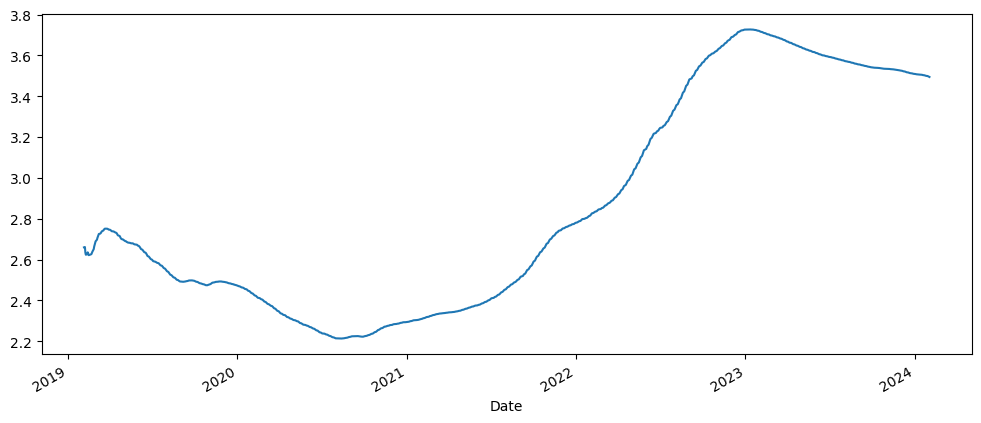

In [13]:
# Cumulative moving average
# The expanding mean calculates the average from the start of the series to each point,
df['Natural_Gas_Price'].expanding().mean().plot(figsize=(12, 5))

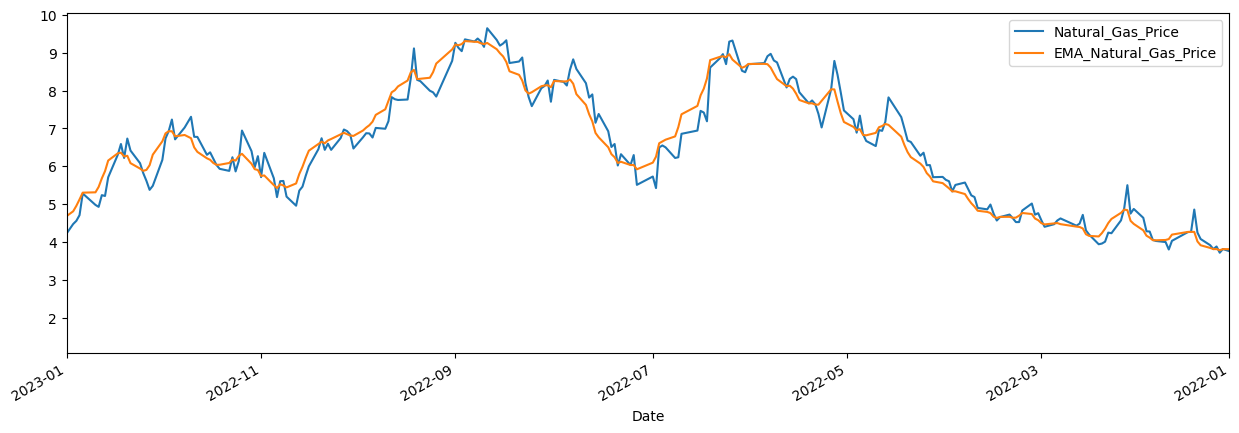

In [14]:
# Exponential Moving Average
# Smoothing Factor = 0.1
df['EMA_Natural_Gas_Price'] = df['Natural_Gas_Price'].ewm(alpha=0.3,adjust = False).mean()
df[['Natural_Gas_Price','EMA_Natural_Gas_Price']].plot(xlim=['2023-01-01','2022-01-01'],figsize=(15, 5))
plt.show()

#### Autocorrelation
Autocorrelation (ACF) measures both the direct and indirect effects of previous values on the current value in a time series. It gives us an overall correlation at various lags without distinguishing between the direct impact of a specific past value and the indirect impact mediated through its influence on other past values.

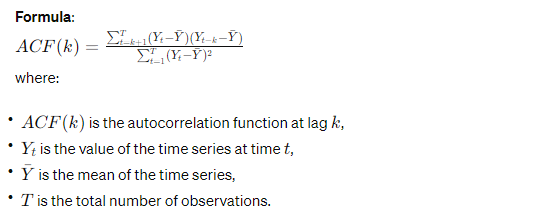

Graph Explanation: An ACF plot (or correlogram) displays the autocorrelation values along the y-axis and the lags along the x-axis. A significant autocorrelation value indicates that the time series observation at a particular lag is strongly influenced by the values at the specified lag distance. The significance level is often marked by horizontal lines (confidence intervals). A slow decay in the ACF plot suggests a non-stationary series, while a sharp drop usually indicates a stationary series.

#### Partial Autocorrelation
Partial Autocorrelation (PACF), on the other hand, measures the direct effect of past values on the current value, controlling for the effects of the values at shorter lags. It isolates the correlation between observations at two points in time, removing the influence of the points in between.

Graph Explanation: Similar to the ACF plot, a PACF plot shows partial autocorrelation values at different lags. Significant spikes in the PACF plot indicate potential lags that could be used in AR terms of time series models. The number of significant lags before the PACF cuts off (drops to insignificance) can suggest the order of an AR model.

<Figure size 1400x700 with 0 Axes>

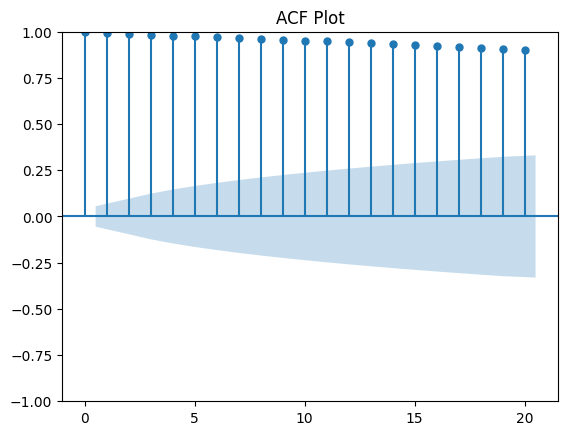

<Figure size 1400x700 with 0 Axes>

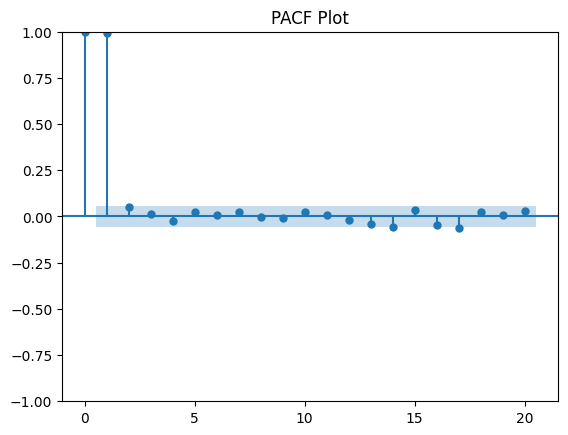

In [15]:
# Generating ACF plot
plt.figure(figsize=(14, 7))
plot_acf(df['Natural_Gas_Price'], lags=20, alpha=0.05)
plt.title('ACF Plot')
plt.show()

# Generating PACF plot
plt.figure(figsize=(14, 7))
plot_pacf(df['Natural_Gas_Price'], lags=20, alpha=0.05)
plt.title('PACF Plot')
plt.show()

#### ACF and PACF

##### How to Read an ACF Plot
Lag Number (X-axis): The horizontal axis of the ACF plot represents the lag, measured in the time units of the data (e.g., days, months). Each point on the x-axis corresponds to a specific lag.

Correlation (Y-axis): The vertical axis shows the correlation coefficient ranging from -1 to 1. A value close to 1 indicates a strong positive correlation, whereas a value close to -1 indicates a strong negative correlation.

Significance Bands: Horizontal lines (usually shaded or colored) around the zero line indicate the confidence intervals, typically set at 95%. Correlation values that extend beyond these lines are statistically significant.

Interpreting Correlations:

Decay: If the ACF values start high and decay slowly as lags increase, it suggests that the data is likely non-stationary and may require differencing to remove trends or seasonality.
Sharp Drop: A sharp drop after a few lags suggests a stationary series.
Seasonal Patterns: Regular spikes at fixed intervals indicate seasonality in the data.
Positive vs. Negative Correlations: Positive values suggest a direct relationship, while negative values suggest an inverse relationship between past and future values.

##### How to Read a PACF Plot
Lag Number (X-axis): Similar to the ACF plot, the x-axis represents the lag. However, PACF shows the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags.

Partial Correlation (Y-axis): The y-axis indicates the partial correlation coefficient. Values can range from -1 to 1, with the interpretation similar to the ACF plot but reflecting direct relationships only.

Significance Bands: The horizontal lines around zero represent the confidence intervals. Values outside these bands are considered significant.

Interpreting Partial Correlations:
Cut-off Point: The lag at which the PACF cuts off (i.e., drops to zero and stays within the confidence interval) indicates the order of an autoregressive (AR) model that might be suitable for the data.
Significant Lags: Significant spikes at specific lags suggest that those lags have a direct influence on the series. This is critical for identifying the appropriate AR terms in ARIMA modeling.
Damped Oscillations: Alternating significant positive and negative values can indicate over-differencing in the data.

For ARIMA model selection, use the PACF plot to determine the AR component's order (p) by identifying the lag where PACF becomes insignificant, which suggests a starting point for p. Similarly, use the ACF plot to identify the MA component's order (q), focusing on where significant lags start to become insignificant, indicating a potential value for q.

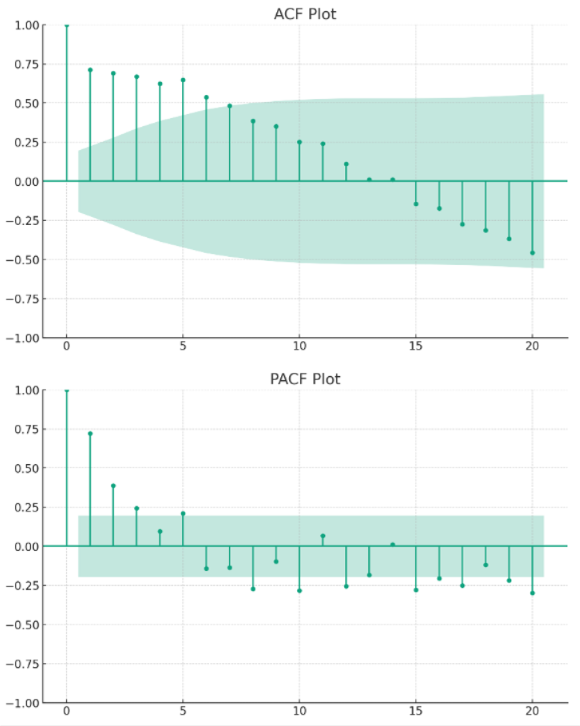

##### ACF Plot Explanation
Periodicity Identification: The ACF plot exhibits peaks at intervals that correspond to the sine wave's period in the generated data. These peaks suggest a recurring pattern or seasonality in the data, which is a key feature ACF is useful for identifying.

Decay Pattern: Between the peaks, the autocorrelation values decrease, indicating that the correlation between observations weakens as the lag increases. This decay pattern is typical for data with underlying periodic behavior mixed with noise.

Statistical Significance: The plot includes a shaded area representing the confidence interval (usually set to 95% confidence, corresponding to an alpha value of 0.05). Autocorrelation values outside this area are statistically significant. In our plot, significant autocorrelations are observed at lags corresponding to the sine wave's frequency, underscoring the data's seasonality.

Noise Influence: The fluctuations in autocorrelation values, including those near zero or within the confidence interval, reflect the influence of noise on the data. This randomness introduces variability in the strength of autocorrelation at different lags.

##### PACF Plot Explanation
Direct Effect Isolation: The PACF plot highlights the direct correlation between observations at a given lag, removing the influence of correlations at shorter lags. Significant values at the first few lags indicate a direct relationship not accounted for by intervening observations.

Rapid Significance Drop-off: The plot shows a sharp decline in partial autocorrelation values after the first few lags, suggesting that the direct influence of past observations on future values quickly diminishes. This is indicative of the noise component's effect and the nature of the generated data.

Confidence Interval and Significance: Similar to the ACF plot, the PACF plot uses a shaded area to denote the confidence interval. Values outside this area at specific lags are considered statistically significant. The rapid transition to insignificance beyond the initial lags in the PACF plot suggests a limited autoregressive component in the data's generation process.

Autoregressive Order Suggestion: The number of significant lags before the PACF cuts off can inform the order of an autoregressive (AR) model for the data. In this case, the significant correlation at the initial lag(s) followed by a cut-off suggests a potential AR model of low order might be appropriate for modeling the data, despite the underlying seasonality primarily captured by the ACF.

#### Auto Regression
Auto Regression (AR) is a type of statistical model used in time series analysis where the current value of a series is explained as a function of its previous values. It's a model that captures the dependencies between an observation and a number of lagged observations (previous time steps). The AR model is commonly used for forecasting future values in the series based on its own past values.

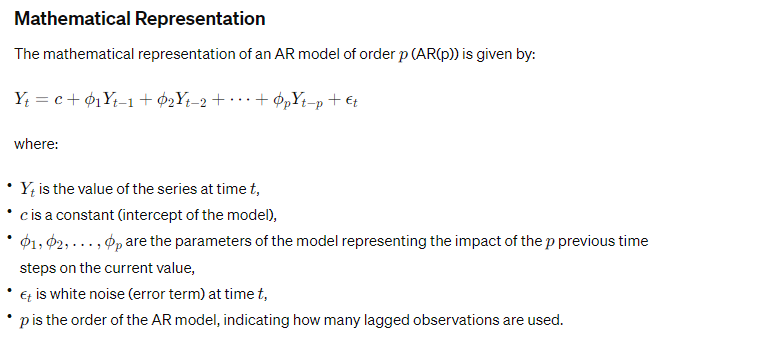

Key Concepts
Order of the Model (p): This is a crucial parameter that determines the number of lagged observations included in the model. Selecting the appropriate value for p is essential for effective modeling and forecasting. Tools like the Partial Autocorrelation Function (PACF) plot are used to help identify an appropriate value for p.

Stationarity Requirement: AR models require the time series to be stationary, meaning its statistical properties (mean, variance) do not change over time. Non-stationary data often require transformations, such as differencing, to make them stationary before applying AR models.

Forecasting: Once an AR model is fitted to a time series, it can be used to forecast future values. The model uses the coefficients (ϕ) learned from historical data to predict future data points.

Model Fitting: Fitting an AR model involves estimating the parameters (c,ϕ1,....,ϕp ) that best capture the relationship between the current value of the series and its past values. This is typically done using methods like Maximum Likelihood Estimation (MLE) or Ordinary Least Squares (OLS).

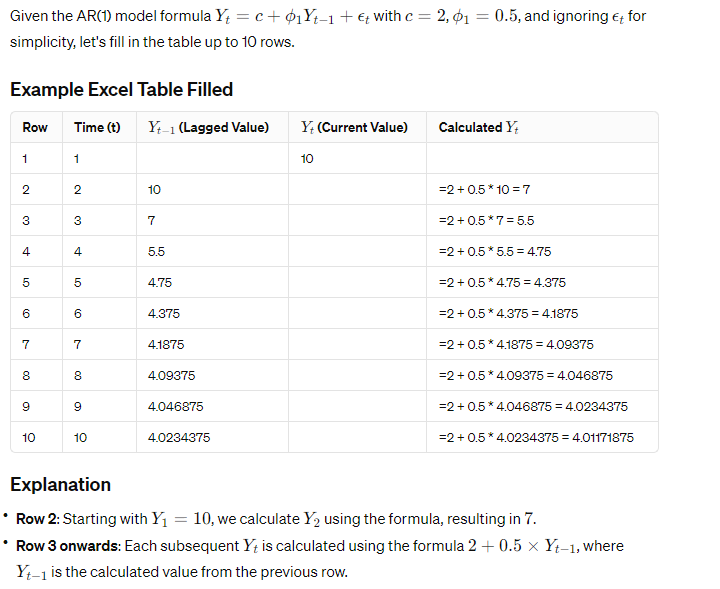

The initial value (at time t=1) serves as the starting point or seed for generating the subsequent values in the series based on the AR model. The absence of additional "Current Value" entries after the first is a simplification to emphasize the model's predictive process. In practice, you would have a series of observed "Current Values" in real-world data, and the model would be used to forecast future values beyond this observed series.

                            AutoReg Model Results                             
Dep. Variable:      Natural_Gas_Price   No. Observations:                 1243
Model:                     AutoReg(3)   Log Likelihood                 310.304
Method:               Conditional MLE   S.D. of innovations              0.188
Date:                Fri, 23 Feb 2024   AIC                           -610.608
Time:                        04:57:31   BIC                           -584.994
Sample:                             3   HQIC                          -600.975
                                 1243                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0164      0.012      1.412      0.158      -0.006       0.039
Natural_Gas_Price.L1     0.9363      0.028     32.974      0.000       0.881       0.992
Natural_Gas_

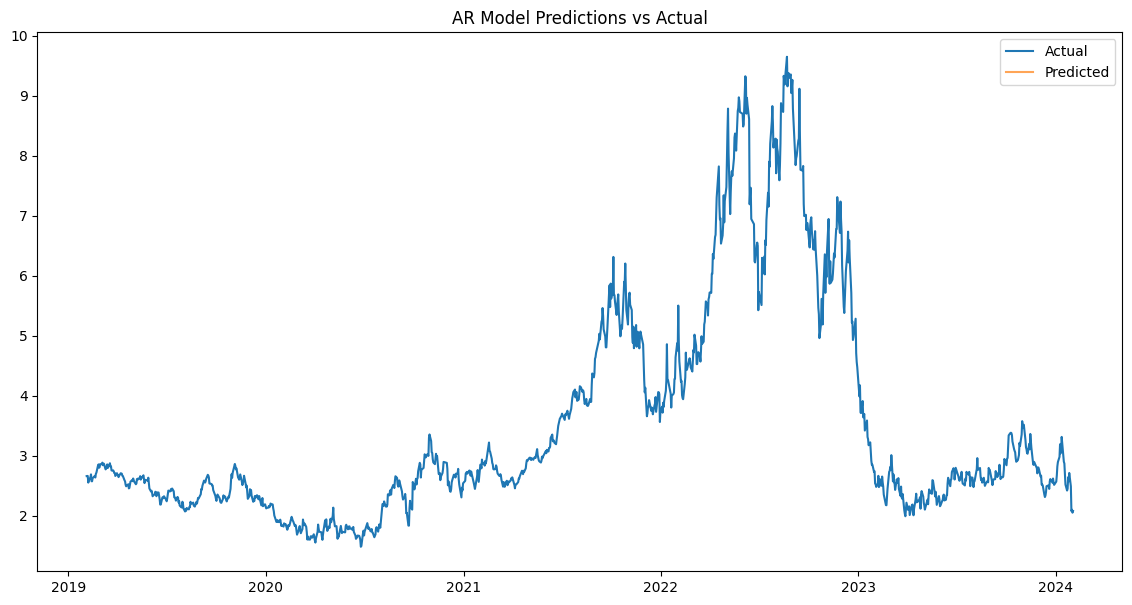

<Figure size 1400x700 with 0 Axes>

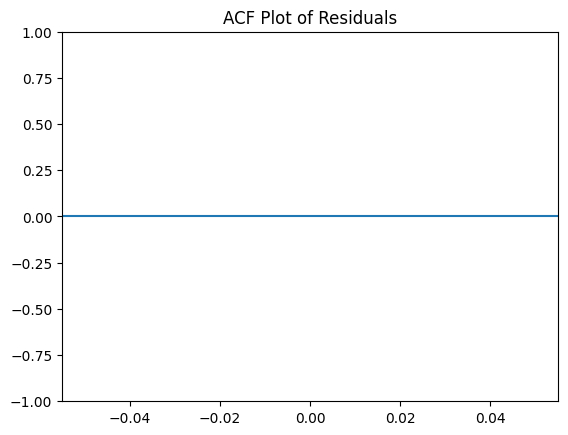

In [16]:
# Define the lag
lag = 3  # Example lag value
# Choose an appropriate lag for the AR model. The lag could be determined based on domain knowledge, ACF/PACF plots, or iteratively testing different values for the best model performance.

# Fit the AR model
model = AutoReg(df['Natural_Gas_Price'], lags=lag)
model_fitted = model.fit()

# Print Model Summary
print(model_fitted.summary())

# Predictions
predictions = model_fitted.predict(start=lag, end=len(df['Natural_Gas_Price'])-1, dynamic=False)

# Plot Predictions and Actual Values
plt.figure(figsize=(14, 7))
plt.plot(df['Natural_Gas_Price'], label='Actual')
plt.plot(predictions, label='Predicted', alpha=0.7)
plt.legend()
plt.title('AR Model Predictions vs Actual')
plt.show()

# Generating ACF Plot for Residuals

# Calculate residuals
residuals = df['Natural_Gas_Price'][lag:] - predictions

# Plot the ACF of residuals
plt.figure(figsize=(14, 7))
plot_acf(residuals, lags=20, alpha=0.05)
plt.title('ACF Plot of Residuals')
plt.show()

#### Dickey-Fuller Test
The most important results are the test statistic and the p-value. The null hypothesis of the Dickey-Fuller test is that the time series is non-stationary (it has a unit root). A p-value less than a threshold (e.g., 0.05) suggests rejecting the null hypothesis, indicating the time series might be stationary.

In [17]:
# Perform the Dickey-Fuller Test

result = adfuller(df['Natural_Gas_Price'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation based on p-value
if result[1] < 0.05:
    print("The time series is likely stationary (Reject the null hypothesis).")
else:
    print("The time series is likely non-stationary (Fail to reject the null hypothesis).")

# Interpretation based on ADF Statistic vs Critical Values
print("\nInterpretation based on ADF Statistic and Critical Values:")
if result[0] < result[4]["5%"]:
    print("The ADF statistic is less than the 5% critical value.")
    print("The time series is likely stationary (Reject the null hypothesis).")
else:
    print("The ADF statistic is greater than the 5% critical value.")
    print("The time series is likely non-stationary (Fail to reject the null hypothesis).")

ADF Statistic: -1.662526
p-value: 0.450516
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
The time series is likely non-stationary (Fail to reject the null hypothesis).

Interpretation based on ADF Statistic and Critical Values:
The ADF statistic is greater than the 5% critical value.
The time series is likely non-stationary (Fail to reject the null hypothesis).


#### Making Non stationary time series stationary

##### Differencing
Differencing is a method used in time series analysis to make a non-stationary series stationary. It involves subtracting the current observation from the previous observation. This process can remove trends and seasonal patterns from the data, making it suitable for forecasting models that assume stationarity. Differencing can be applied more than once (e.g., second differencing) if the series remains non-stationary after the initial differencing.

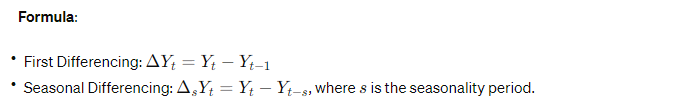

In [18]:
# First Differencing
df['First_Difference'] = df['Natural_Gas_Price'].diff(1)
print(df['First_Difference'].head(5))

# Seasonal Differencing
seasonal_period = 12  # Example for monthly data with yearly seasonality
df['Seasonal_Difference'] = df['Natural_Gas_Price'].diff(365)
print(df['Seasonal_Difference'].tail(5))

Date
2019-02-04      NaN
2019-02-05    0.002
2019-02-06    0.000
2019-02-07   -0.111
2019-02-08    0.032
Name: First_Difference, dtype: float64
Date
2024-01-29   -6.278
2024-01-30   -6.651
2024-01-31   -7.229
2024-02-01   -7.194
2024-02-02   -7.109
Name: Seasonal_Difference, dtype: float64


##### Transformation
Transformation in time series analysis involves applying mathematical functions to data to stabilize variance, reduce skewness, or make the series more closely resemble a normal distribution. Common transformations include logarithmic, square root, and Box-Cox, each addressing issues like heteroscedasticity or non-linearity. These transformations are preparatory steps to meet the assumptions of many statistical models, enabling more accurate analysis and forecasting by rectifying structural issues in the data.

Logarithmic Transformation: Reduces variability in exponential growth data.

Square Root Transformation: Moderately reduces variability and handles both positive and zero values.

Box-Cox Transformation: Stabilizes variance and makes the distribution more normal-like.

Inverse Transformation: Useful for data following a reciprocal pattern.

Exponential Transformation: Applied to data with constant percentage changes.

Difference Transformation: Removes trends and seasonal patterns by subtracting current from previous values.

Standardization/Normalization: Scales data to a specific range or distribution without altering its shape.

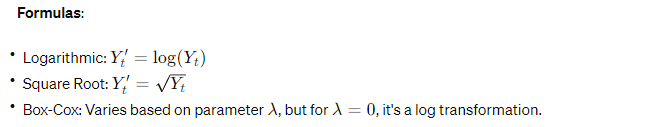

In [19]:
from scipy.stats import boxcox

# Log Transformation
df['Log_Transform'] = np.log(df['Natural_Gas_Price'])

# Square Root Transformation
df['Sqrt_Transform'] = np.sqrt(df['Natural_Gas_Price'])

# Box-Cox Transformation
df['BoxCox_Transform'], fitted_lambda = boxcox(df['Natural_Gas_Price'])


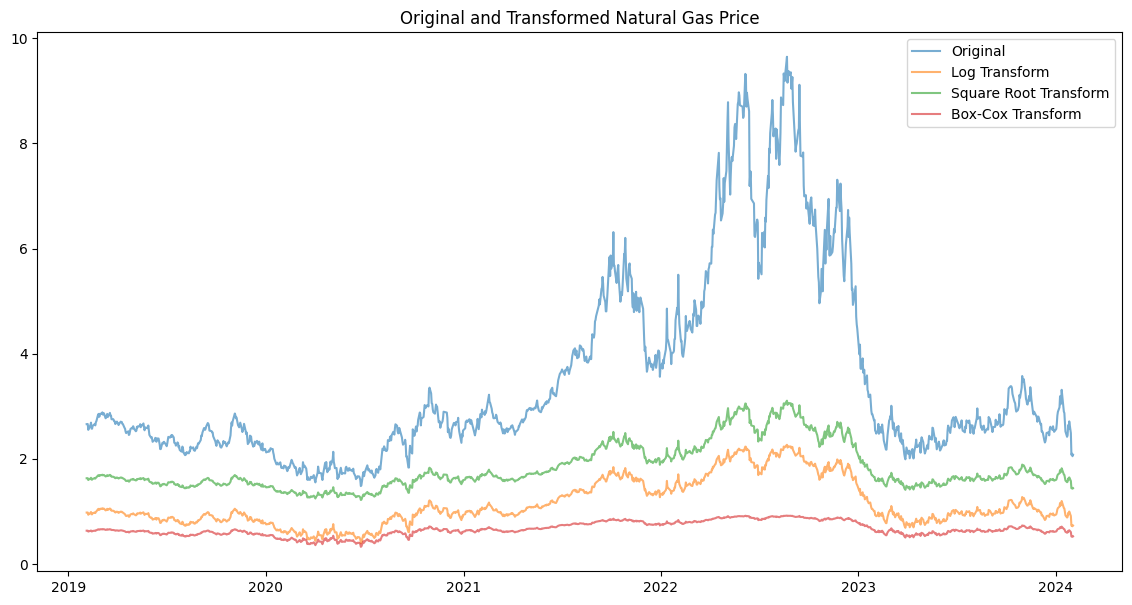

In [20]:
plt.figure(figsize=(14, 7))

# Original Data
plt.plot(df['Natural_Gas_Price'], label='Original', alpha=0.6)

# Log Transformation
plt.plot(df['Log_Transform'], label='Log Transform', alpha=0.6)

# Square Root Transformation
plt.plot(df['Sqrt_Transform'], label='Square Root Transform', alpha=0.6)

# Box-Cox Transformation
plt.plot(df['BoxCox_Transform'], label='Box-Cox Transform', alpha=0.6)

plt.title('Original and Transformed Natural Gas Price')
plt.legend()
plt.show()

#### Autoregressive Moving Average

Autoregressive Moving Average (ARMA) model is a class of statistical models used for analyzing and forecasting time series data. It combines autoregressive (AR) and moving average (MA) processes to capture both the linear dependence between past observations (AR component) and the impact of random shocks on current observations (MA component).

##### Working Theory
The ARMA model assumes that the time series data can be represented as a combination of its autoregressive and moving average components. By estimating the parameters ϕi and θi, the model captures the linear dependence and the impact of random shocks in the data.

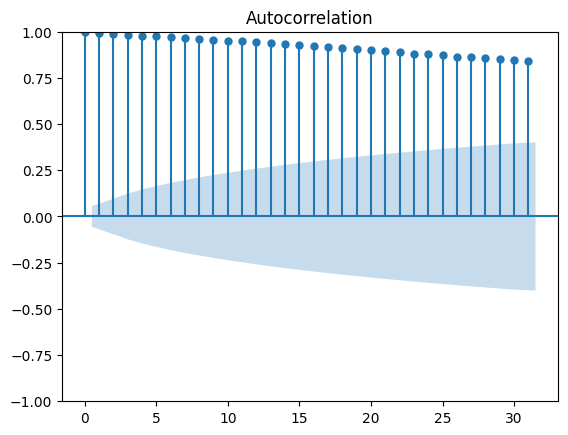

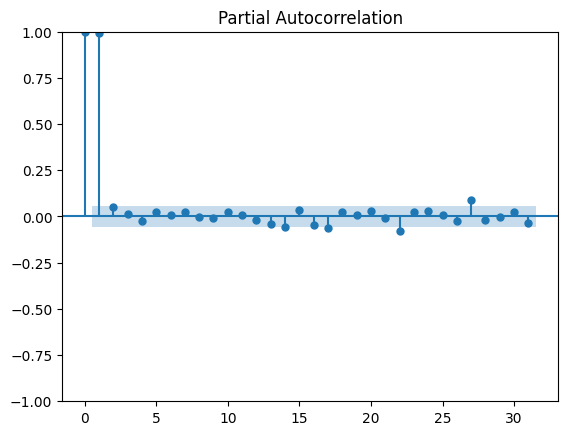

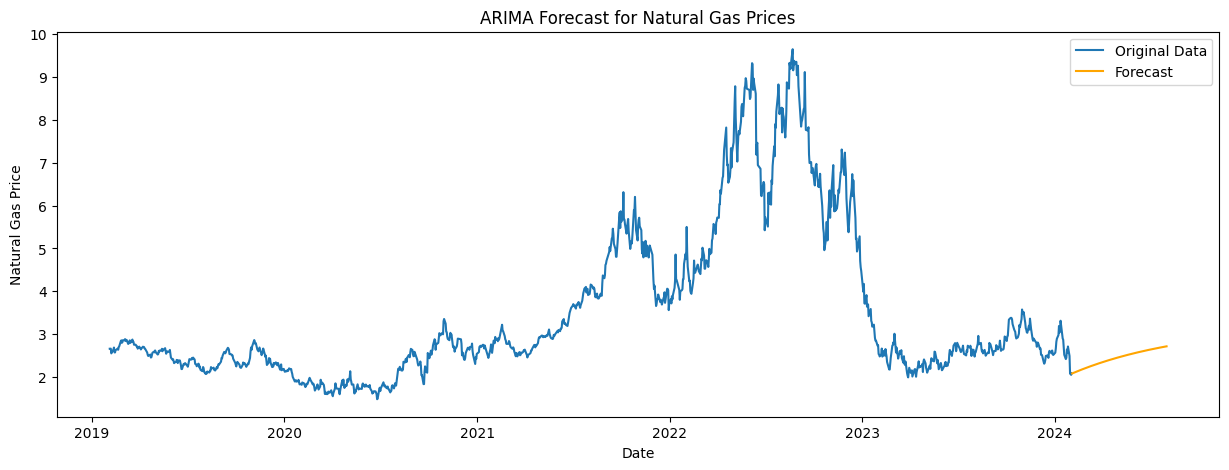

In [21]:
# Fit an ARMA model to the data
# Determine the order (p, d, q) for ARMA model using ACF and PACF plots
plot_acf(df['Natural_Gas_Price'])
plot_pacf(df['Natural_Gas_Price'])
plt.show()

# Based on the plots, select appropriate values for p and q
# Example: Fit an ARMA(2, 1) model
model = ARIMA(df['Natural_Gas_Price'], order=(2, 0, 1))
arma_results = model.fit()

# Step 3: Generate predictions for the next six months
forecast = arma_results.forecast(steps=180)  # 6 months = 180 days

# Step 4: Plot the forecasted values
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Natural_Gas_Price'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=181)[1:], forecast, label='Forecast', color='orange')
plt.title('ARIMA Forecast for Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.legend()
plt.show()

#### How to determine the values of p, d and q:
p: The lag value where the PACF plot crosses the upper confidence interval for the first time. This indicates the order of the autoregressive (AR) component.
q: The lag value where the ACF plot crosses the upper confidence interval for the first time. This indicates the order of the moving average (MA) component.
d: The number of differencing operations performed before the data becomes stationary can provide an indication of the value of d. The choice of d is somewhat subjective and may require some trial and error. It's important to strike a balance between making the data stationary and retaining useful information. Over-differencing can lead to loss of information, while under-differencing may result in non-stationary residuals.

Let's illustrate this with an example:
p: In the PACF plot, the first significant lag value where the correlation crosses the upper confidence interval is around lag 1. So, p≈1.
q: In the ACF plot, the first significant lag value where the correlation crosses the upper confidence interval is around lag 2. So, q≈2.

#### ARIMA 

The Autoregressive Integrated Moving Average (ARIMA) model is a popular time series forecasting model that combines three components: Autoregression (AR), Differencing (I), and Moving Average (MA).

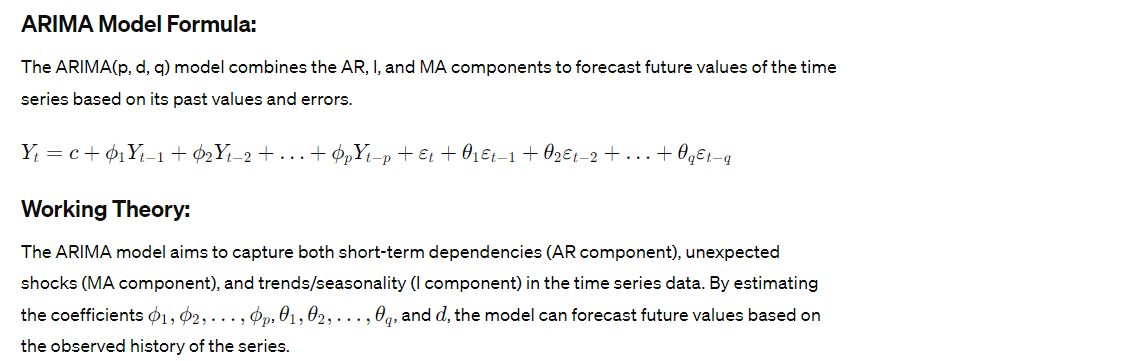

When to Use ARIMA Model:
Use the ARIMA model when the time series data exhibits trend and/or seasonality patterns that need to be addressed.
ARIMA is suitable for both stationary and non-stationary time series data.

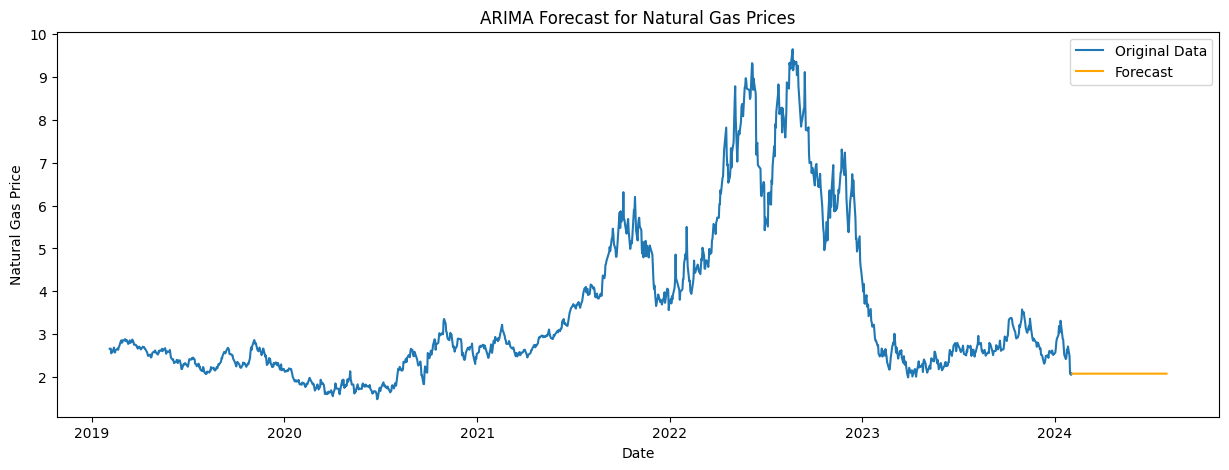

In [22]:
# Fit an ARIMA model to the data (example: ARIMA(2, 1, 1))
model = ARIMA(df['Natural_Gas_Price'], order=(2, 1, 1))
arima_results = model.fit()

# Generate predictions for the next 6 months
forecast = arima_results.forecast(steps=180)  # 6 months = 180 days

# Plot the original data and the forecast
plt.figure(figsize=(15, 5))
plt.plot(df['Natural_Gas_Price'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=181)[1:], forecast, label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.title('ARIMA Forecast for Natural Gas Prices')
plt.legend()
plt.show()

#### SARIMA
The SARIMA model captures both the non-seasonal and seasonal patterns in the time series data. It combines the AR, I, and MA components with their seasonal counterparts to provide forecasts that account for both short-term and long-term patterns in the data.

Seasonal (S) Component: Represents the seasonal patterns in the data. The seasonal component is added to account for periodic fluctuations at fixed intervals (e.g., daily, weekly, monthly).

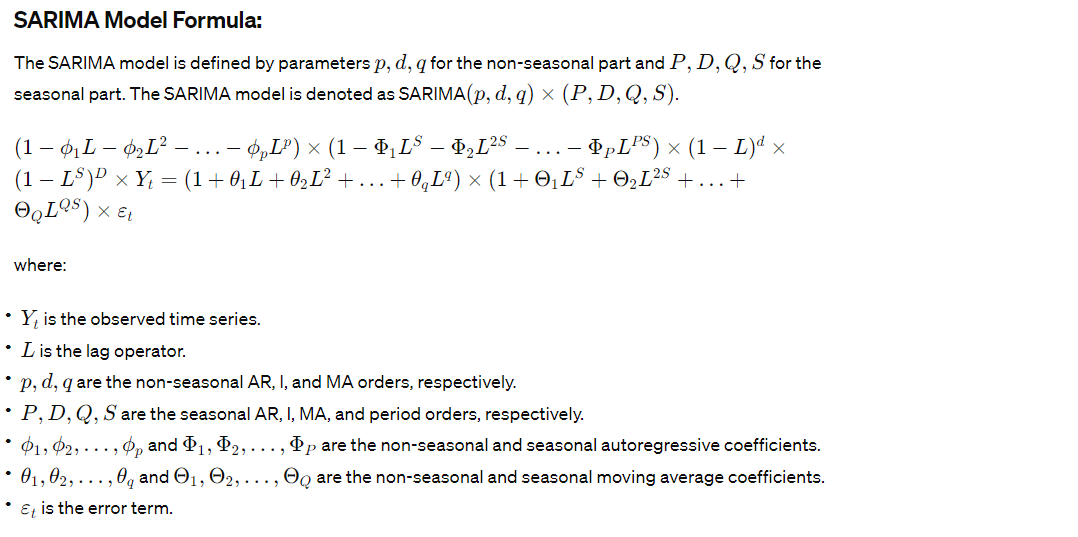

##### Working Theory:

The SARIMA model captures both the non-seasonal and seasonal patterns in the time series data. It combines the AR, I, and MA components with their seasonal counterparts to provide forecasts that account for both short-term and long-term patterns in the data.

##### When to Use SARIMA Model:

Use SARIMA when the time series data exhibits both non-seasonal and seasonal patterns.
SARIMA is suitable for time series data with trends and periodic fluctuations.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.10790D-01    |proj g|=  1.43125D+00


 This problem is unconstrained.



At iterate    5    f= -1.61823D-01    |proj g|=  2.37708D-01

At iterate   10    f= -1.85374D-01    |proj g|=  1.79437D-01

At iterate   15    f= -2.21733D-01    |proj g|=  5.17125D-02

At iterate   20    f= -2.25176D-01    |proj g|=  2.22477D-02

At iterate   25    f= -2.25480D-01    |proj g|=  1.21751D-02

At iterate   30    f= -2.25500D-01    |proj g|=  9.91641D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     49      1     0     0   1.958D-03  -2.255D-01
  F = -0.22550173619046135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


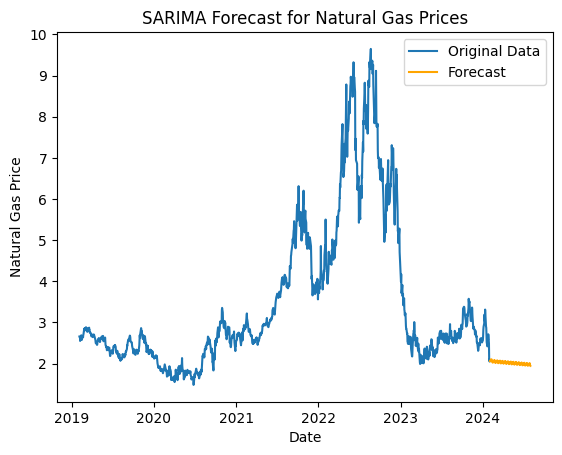

In [23]:
model = SARIMAX(df['Natural_Gas_Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = model.fit()

# Generate predictions for the next 6 months
forecast = sarima_results.forecast(steps=180)  # 6 months = 180 days

# Plot the original data and the forecast
plt.plot(df['Natural_Gas_Price'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=181)[1:], forecast, label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.title('SARIMA Forecast for Natural Gas Prices')
plt.legend()
plt.show()